This notebook contains does some basic data visualizations for booking data from the Fulton County jail data from the beginning of 2017 to the present (November 26th).

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
time_columns = ['inmate_dob',
               'booking_timestamp',
               'release_timestamp',
               'court_date']

index_col = 'inmate_id'

In [9]:
scrape1 = pd.read_csv("fulton_2017-11-26_09-15-47.csv", 
                     parse_dates=time_columns,
                     index_col=index_col)
scrape2 = pd.read_csv("fulton_2017-11-26_10-34-04.csv",
                     parse_dates=time_columns,
                     index_col=index_col)

Change the above cell to refer to the file locations on your computer (The reason it is two files is that I encountered a previously unseen error halfway through, and had to put a new `try/except` into the code and restart the scraping).

In [10]:
len(scrape1)

11976

In [11]:
len(scrape2)

11594

In [12]:
df = pd.concat([scrape1,scrape2])

In [13]:
len(df)

23570

In [15]:
df.columns

Index(['county_name', 'timestamp', 'url', 'inmate_lastname',
       'inmate_firstname', 'inmate_middlename', 'inmate_sex', 'inmate_race',
       'inmate_age', 'inmate_dob', 'inmate_address', 'booking_timestamp',
       'release_timestamp', 'processing_numbers', 'agency', 'facility',
       'charges', 'severity', 'bond_amount', 'current_status', 'court_date',
       'days_jailed', 'other', 'notes'],
      dtype='object')

In [16]:
df['days_jailed'] = df.release_timestamp - df.booking_timestamp

In [17]:
df['days_jailed_np'] = df.days_jailed.dt.days

In [25]:
df.loc[df['days_jailed_np']>7,'days_jailed_np'] = 7

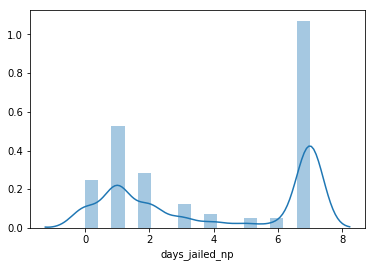

In [26]:
sns.distplot(df['days_jailed_np'].dropna())

This gives us the overall distribution of time imprisoned for everyone in our dataset who has been released.

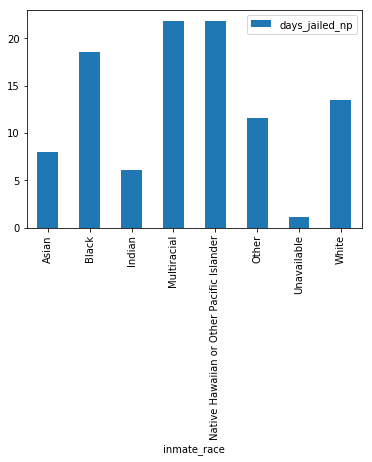

In [19]:
df.groupby('inmate_race').agg({'days_jailed_np' : np.mean}).plot(kind='bar')

This gives us mean time in prison by race.

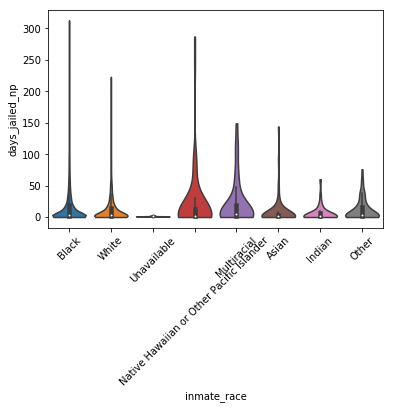

In [20]:
ax= sns.violinplot(data=df, x='inmate_race', y='days_jailed_np', cut=0, scale='width')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

This is a violin plot, which gives us a breakdown of how the distribution of days in jail varies by race. Unfortunately I can't figure out how to set the category labels nicely.